# Birthday Problem

## Understanding the Problem:
1. Total Number of Days in a Year: Assume 365 days (ignoring leap years).
2. Number of Students (𝑁): The number of students in the group.
3. Complement Rule:
 * Instead of directly calculating the probability of at least two students sharing a birthday, calculate the probability that no one shares a birthday and subtract it from 1:
      * P(At least one match)=1-P(No matches)


## Probability of No Matches:
The probability that N students have unique birthdays is calculated as follows:
1. The first student can have any birthday (365/365)
2. The second student must have a different birthday (364/365).
3. The third student must also have a different birthday(363/365).
5. continue this for all N students.

the probbility of no match is :    
 * P(No Matches)= (365/365)x(364/265)x(363/365)x...X((365-N-1)/365)
* For N > 365 , P(No matches)=0 because there are only 365 days, so at least two must share
 birthday.





In [29]:
def birthday_probability(n):
    """
    Calculate the probability of at least two people sharing a birthday
    in a group of n people.

    Parameters:
        n (int): Number of people in the group.

    Returns:
        float: Probability of at least one shared birthday.
    """
    if n > 365:
        return 1.0  # Guaranteed match since there are only 365 possible birthdays

    prob_no_match = 1.0  # Start with 100% probability
    days_in_year = 365

    for i in range(n):
        prob_no_match *= (days_in_year - i) / days_in_year

    # At least one match
    prob_at_least_one_match = 1 - prob_no_match
    return prob_at_least_one_match

# Example usage:
n = 23  # Number of students
probability = birthday_probability(n)*100
print(f"The probability of at least two students sharing a birthday in a group of {n} is {probability:.4f}%")


The probability of at least two students sharing a birthday in a group of 23 is 50.7297%


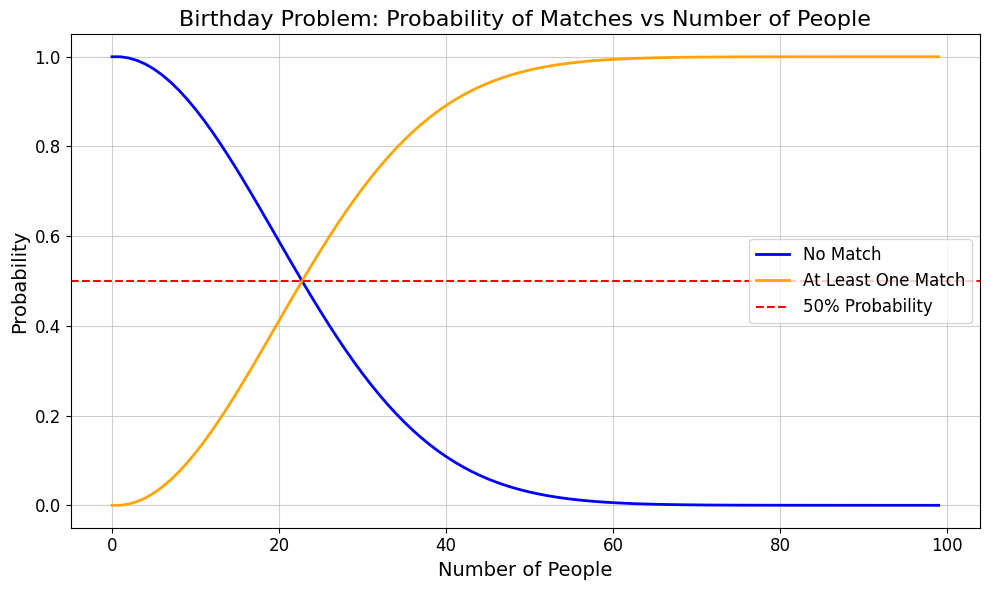

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def birthday_probabilities(max_people):
    """
    Calculate the probabilities of no match and at least one match
    for groups of people up to max_people.

    Parameters:
        max_people (int): Maximum number of people in the group.

    Returns:
        (np.ndarray, np.ndarray): Probabilities of no match and at least one match.
    """
    days_in_year = 365
    prob_no_match = np.ones(max_people)

    # Iteratively calculate probabilities
    for i in range(1, max_people):
        prob_no_match[i] = prob_no_match[i - 1] * (days_in_year - i + 1) / days_in_year

    prob_at_least_one_match = 1 - prob_no_match
    return prob_no_match, prob_at_least_one_match

# Parameters
max_people = 100  # Number of people to consider
prob_no_match, prob_match = birthday_probabilities(max_people)

# Plotting
plt.figure(figsize=(10, 6))
x = np.arange(max_people)

plt.plot(x, prob_no_match, label="No Match", color="blue", linewidth=2)
plt.plot(x, prob_match, label="At Least One Match", color="orange", linewidth=2)

# Add annotations and labels
plt.title("Birthday Problem: Probability of Matches vs Number of People", fontsize=16)
plt.xlabel("Number of People", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.axhline(y=0.5, color="red", linestyle="--", label="50% Probability")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [11]:
  prsob_no_match = np.ones(7)
  prsob_no_match.shape

(7,)

## Birthday Problem using Monte Carlo

In [13]:
people = 100
import numpy as np
from scipy import stats
year = np.zeros(366, dtype=int) # including February 29th
results = np.array([])
for i in range(people):
    birthday = np.random.randint(0, 366, 1) # one number from 0 to 366
    year[birthday] += 1
print(year)
matches = 0
for i in range(366):
    if(year[i]>1):
        matches = matches + year[i]
print('people: {}'.format(people))
print('matches: {}'.format(matches))
import math, random, sys
from decimal import Decimal as dml
expected =  (1 - dml(math.factorial(365)) / ( 365**people * math.factorial(365-people)))*100
expected = np.floor(expected)
expected = int(expected)
print('expected: {} %'.format(expected))

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 2 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 2 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 2 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 2 0 0 1 1 1 0 1 1 0 0 1 0 3 0 0 0]
people: 100
matches: 21
expected: 99 %
